In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
path = "youtube_comments_climate_change/cleaned_data.csv"
data = pd.read_csv(path, sep=",", encoding='utf-8')

list(data.columns)

['Unnamed: 0', 'publishedAt', 'authorName', 'text', 'isReply', 'cleaned']

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(hub_url)
embeddings = embed(data['cleaned'])

print(embeddings)
print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

tf.Tensor(
[[ 0.02267956 -0.06716511  0.01718922 ... -0.0158857  -0.043926
  -0.00393031]
 [ 0.04192     0.07056528  0.09499479 ... -0.03520851 -0.0134883
   0.04670066]
 [-0.06692986 -0.00541758 -0.03079402 ...  0.02694076 -0.01263959
  -0.07979716]
 ...
 [-0.01887087  0.06309654  0.10515169 ... -0.01325583 -0.04266983
   0.01906748]
 [ 0.01090654 -0.08720968 -0.00068635 ...  0.00569523 -0.01905336
  -0.04718436]
 [ 0.0252452  -0.01673799 -0.06606336 ... -0.00096804 -0.04874957
  -0.04058736]], shape=(25914, 512), dtype=float32)
The embeddings vector is of fixed length 512


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity

cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000002   0.00968165  0.12730817 ... -0.04107114  0.24598777
   0.35544437]
 [ 0.00968165  1.          0.027156   ...  0.5482285   0.0241364
   0.05005576]
 [ 0.12730817  0.027156    0.99999964 ...  0.20292103  0.16645284
   0.04606095]
 ...
 [-0.04107114  0.5482285   0.20292103 ...  1.0000002   0.02003537
   0.01877565]
 [ 0.24598777  0.0241364   0.16645284 ...  0.02003537  1.
   0.21783942]
 [ 0.35544437  0.05005576  0.04606095 ...  0.01877565  0.21783942
   1.0000001 ]]


### PCA

#### Choosing dimensions by looking at cumulative explained variance ration

In [5]:
X_embed = [np.array(emb) for emb in embeddings]
X = np.array([emb for emb in X_embed])

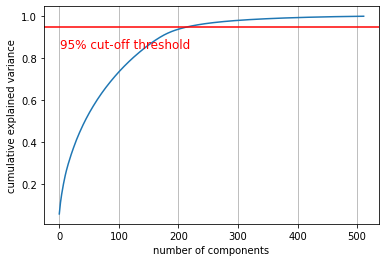

In [6]:
import matplotlib.pyplot as plt

pca_cev = PCA().fit(X)
plt.plot(np.cumsum(pca_cev.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(axis='x')

In [16]:
SUBSPACE_DIM = 200

pca = PCA(n_components= SUBSPACE_DIM)
X_new = pca.fit_transform(X)

X_list = [list(X_new[i]) for i in range(X_new.shape[0])]

print("Dimensions of embeddings matrix after PCA: ({}, {})".format(X_new.shape[0], X_new.shape[1]))

Dimensions of embeddings matrix after PCA: (25914, 200)


In [15]:
print(pca.get_precision())

[[3864.858     129.01105    42.02641  ...  -73.81415   -41.748337
  -181.80408 ]
 [ 129.01105  3815.1836     30.550047 ...  -31.129725  -87.092926
   -21.680368]
 [  42.026382   30.550045 3569.6055   ...   71.40777    36.40134
  -165.77373 ]
 ...
 [ -73.81413   -31.129784   71.40777  ... 3819.178    -115.66477
   114.75978 ]
 [ -41.74827   -87.09289    36.401268 ... -115.664696 3409.148
    -8.523717]
 [-181.80406   -21.680403 -165.77377  ...  114.75984    -8.523844
  4037.0527  ]]


In [21]:
print(pca.components_[0].size)
print(pca.components_[0])

512
[-7.80603103e-03 -3.86379622e-02 -4.07916717e-02  9.97944921e-03
 -5.54416776e-02  4.31772247e-02  3.81156318e-02  1.19013805e-02
  3.50685418e-02 -2.66028754e-03 -3.36913578e-02 -9.09148064e-03
  2.01296881e-02  7.23345531e-03  1.52603723e-02 -5.28726280e-02
  9.84283909e-03  3.33560328e-03 -1.35115078e-02  1.26073519e-02
 -4.38196436e-02 -3.13039646e-02 -3.49252857e-02  9.19815451e-02
  4.15118262e-02 -3.16336122e-03  4.07488234e-02 -1.08589502e-02
  2.71074455e-02 -2.41882354e-02 -6.12753369e-02 -4.89025973e-02
 -3.07106762e-03 -2.55321190e-02  4.99618845e-03  3.90415676e-02
 -1.65431574e-02  2.69792117e-02  1.19269756e-03 -5.08630648e-02
 -1.21297333e-02 -1.11361546e-02 -3.51435728e-02 -3.23922932e-02
 -7.85097405e-02  2.94865910e-02  6.08211569e-02 -1.23080853e-02
  2.43921559e-02 -7.43153095e-02 -3.60873938e-02  2.61375997e-02
  2.32341699e-02  1.63052790e-02  3.89848538e-02 -2.16268618e-02
 -6.34685457e-02  2.22041346e-02  3.39773558e-02  2.13917419e-02
  3.35350223e-02 -4.3

In [28]:
print(pca.explained_variance_ratio_)

[0.05649254 0.02976543 0.02458119 0.02049035 0.01916107 0.01721817
 0.0166051  0.01494635 0.01434662 0.01374328 0.01309334 0.01254196
 0.01110593 0.01063842 0.01035086 0.00992579 0.00946597 0.009389
 0.00909301 0.00891946 0.00862179 0.00851741 0.00822447 0.00801106
 0.00790271 0.00781113 0.00771145 0.00760477 0.00744111 0.00739886
 0.00702237 0.00693141 0.0067448  0.0066141  0.00648514 0.0063821
 0.00634921 0.00630814 0.00612338 0.00607331 0.00597849 0.0058707
 0.00581289 0.00559014 0.00556882 0.00555053 0.00544415 0.00539726
 0.00532994 0.00519619 0.00515041 0.00509427 0.00497236 0.00494461
 0.00488106 0.00475461 0.00474792 0.00470281 0.00465437 0.00464188
 0.0045709  0.00451138 0.00445981 0.00441153 0.00438716 0.00428854
 0.00427003 0.00422867 0.00418902 0.00414073 0.00409129 0.00402955
 0.00398755 0.00397945 0.00397465 0.00385937 0.00384701 0.00379625
 0.00375974 0.00371779 0.0036911  0.00364009 0.00362353 0.00359877
 0.00357679 0.00353323 0.00349186 0.00347785 0.00343733 0.00342382

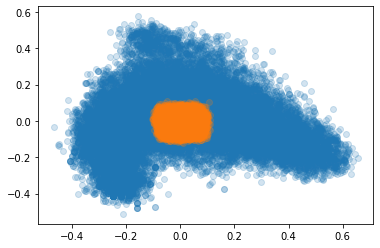

In [13]:
# plot data after pca
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

In [19]:
type(X_list[0])

list

### Clustering with DBSCAN

TODO: takes forevvvverrr

DBSCAN Parameter:
- eps: Max distance between two samples for them to be considered as in a neigborhood, default=0.5
- min_samples: Number of samples in a neighborhood for a point to be considered a core point, default = 5
- metric: Metric for calculating distance between instances in a feature array
- 

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X_new)

In [30]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [32]:
components = db.components_
labels = db.labels_
core_sample_indices = db.core_sample_indices_

In [41]:
labels
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

From docs: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [42]:
frequencies

array([[   -1, 25483],
       [    0,    69],
       [    1,    11],
       [    2,    30],
       [    3,    10],
       [    4,    24],
       [    5,    59],
       [    6,    14],
       [    7,    14],
       [    8,    11],
       [    9,    97],
       [   10,    11],
       [   11,    11],
       [   12,    16],
       [   13,    19],
       [   14,    10],
       [   15,    13],
       [   16,    12]])